In [159]:
import schedule
import time
import datetime as dt
import logging
import pandas as pd
import numpy as np
import pytz
import sqlite3
import sqlalchemy

db_data_path = r'/Users/pankajti/dev/git/wqu/capstone/data/db/capstone.db'
con = sqlite3.connect(db_data_path)
dbEngine = sqlalchemy.create_engine(f'sqlite:///{db_data_path}')


trades = pd.read_sql("select * from trades",dbEngine)


In [160]:
trades.head()

,trade_time,ticker,side,quantity,price,strategy,creatime
0,2024-03-26 09:26:00+05:30,PASUPTAC.NS,buy,1,40.2999992370606,price_breakout,2024-04-27 07:16:59.676345
1,2024-03-26 14:03:00+05:30,SANGAMIND.NS,buy,1.0,448.350006103516,price_breakout,2024-04-27 07:23:48.354952
2,2024-03-26 14:04:00+05:30,PASUPTAC.NS,sell,1.0,37.4000015258789,price_breakout,2024-04-27 07:23:48.354952
3,2024-03-26 14:05:00+05:30,GANDHITUBE.NS,buy,1.0,776.049987792969,price_breakout,2024-04-27 07:23:55.564643
4,2024-03-26 15:03:00+05:30,GANDHITUBE.NS,sell,1.0,740.900024414063,price_breakout,2024-04-27 07:25:12.646088


In [161]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   trade_time  226 non-null    object
 1   ticker      226 non-null    object
 2   side        226 non-null    object
 3   quantity    226 non-null    object
 4   price       226 non-null    object
 5   strategy    226 non-null    object
 6   creatime    226 non-null    object
dtypes: object(7)
memory usage: 12.5+ KB


In [162]:
trades.describe()

,trade_time,ticker,side,quantity,price,strategy,creatime
count,226,226,226,226,226,226,226
unique,152,103,2,2,219,1,115
top,2024-04-01 15:04:00+05:30,AGRITECH.NS,buy,1.0,42.1500015258789,price_breakout,2024-04-27 07:52:09.977470
freq,10,6,113,202,2,226,14


In [163]:
trades['tdate'] = trades.trade_time.str[:10]

In [164]:
trades.sort_values('ticker')

,trade_time,ticker,side,quantity,price,strategy,creatime,tdate
181,2024-04-22 15:04:00.000000,AAATECH.NS,sell,1.0,136.550003051758,price_breakout,2024-04-27 08:49:24.032978,2024-04-22
174,2024-04-22 13:00:00.000000,AAATECH.NS,buy,1.0,141.449996948242,price_breakout,2024-04-27 08:47:52.210643,2024-04-22
99,2024-04-03 14:56:00+05:30,ADVANIHOTR.NS,buy,1.0,89.5999984741211,price_breakout,2024-04-27 08:07:01.368481,2024-04-03
104,2024-04-03 15:04:00+05:30,ADVANIHOTR.NS,sell,1.0,88.1999969482422,price_breakout,2024-04-27 08:07:03.176572,2024-04-03
161,2024-04-16 15:04:00+05:30,AEGISCHEM.NS,sell,1.0,522.400024414063,price_breakout,2024-04-27 08:38:40.773193,2024-04-16
...,...,...,...,...,...,...,...,...
33,2024-03-28 14:23:00+05:30,ZENITHEXPO.NS,buy,1.0,178.449996948242,price_breakout,2024-04-27 07:42:26.372063,2024-03-28
183,2024-04-23 09:26:00.000000,ZIMLAB.NS,buy,1,102.800003051758,price_breakout,2024-04-27 08:49:42.948299,2024-04-23
193,2024-04-23 15:04:00.000000,ZIMLAB.NS,sell,1.0,110.050003051758,price_breakout,2024-04-27 08:54:06.937126,2024-04-23
119,2024-04-12 14:27:00+05:30,ZUARI.NS,buy,1.0,205.5,price_breakout,2024-04-27 08:23:23.689659,2024-04-12


In [165]:
trades_data = trades[['tdate', 'ticker', 'side','quantity' , 'price']]

In [166]:
trades_data['price'] = trades_data.price.astype(float)

/var/folders/tz/k1k21d6x7j1d90h0t6dqf5yc0000gn/T/ipykernel_45703/686818239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trades_data['price'] = trades_data.price.astype(float)


In [167]:
#trades_data['side'] =  trades_data.apply(lambda x : 1 if x['side']=='buy' else -1, axis =1 )*trades_data.quantity.astype(float)

In [168]:
#trades_data['trades_cost'] = trades_data['side']*trades_data.price

In [169]:
trades_data= trades_data.pivot_table(index= ['tdate','ticker'], columns =['side'], values=['price'] )

In [170]:
trades_data=trades_data.T.reset_index().T.reset_index()[2:].rename({0:'buy',1:'sell'},axis=1).dropna()

In [171]:
trades_data['ret']=trades_data.sell-trades_data.buy

In [172]:
daily_return = trades_data.groupby('tdate').sum()['ret']

<Axes: xlabel='tdate'>

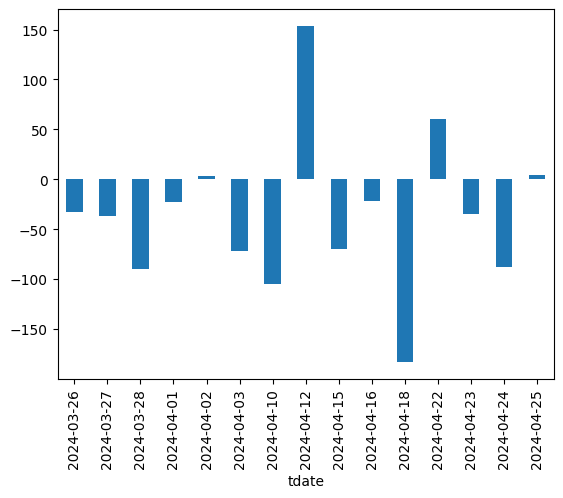

In [173]:
daily_return.plot(kind='bar')

In [174]:
daily_return.std()

77.06987115062871

In [175]:
daily_return.mean()

-35.53331921895433

In [191]:
sharpe_ratio = daily_return.mean()/daily_return.std()
print(f" Sharpe ratio::  {sharpe_ratio}")

 Sharpe ratio::  -0.4610533103072985


In [179]:
import matplotlib.pyplot as plt

## Plt maxdrawdown

In [184]:
xs

tdate
2024-03-26    -32.399967
2024-03-27    -69.399952
2024-03-28   -159.600048
2024-04-01   -182.450069
2024-04-02    -178.75008
2024-04-03   -250.150082
2024-04-10   -354.800083
2024-04-12   -201.150028
2024-04-15   -270.749977
2024-04-16   -292.300026
2024-04-18   -475.349934
2024-04-22   -415.299883
2024-04-23   -449.749887
2024-04-24    -537.59984
2024-04-25   -532.999788
Name: ret, dtype: object

/var/folders/tz/k1k21d6x7j1d90h0t6dqf5yc0000gn/T/ipykernel_45703/2157712442.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([i, j], [xs[i], xs[j]], 'o', color='Red', markersize=10)


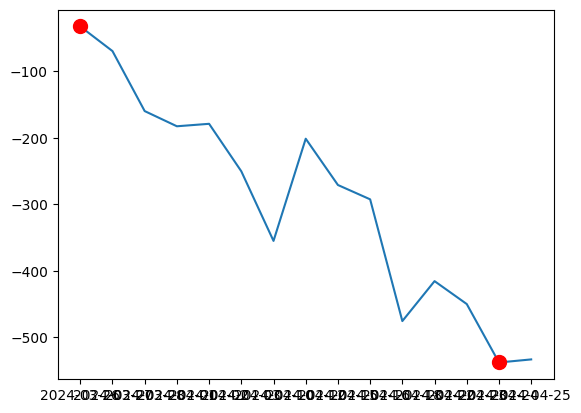

In [188]:
n=20
xs = daily_return.cumsum()
i = np.argmax(np.maximum.accumulate(xs) - xs) # end of the period
j = np.argmax(xs[:i]) # start of period

plt.plot(xs)
plt.plot([i, j], [xs[i], xs[j]], 'o', color='Red', markersize=10)

In [187]:
xs[j]-xs[i]

/var/folders/tz/k1k21d6x7j1d90h0t6dqf5yc0000gn/T/ipykernel_45703/3724533705.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xs[j]-xs[i]


505.1998729705889